In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [21]:
tokens = pd.read_csv('tokensCleaned.csv', sep=';')

In [22]:
tokens['date'] = pd.to_datetime(tokens['date'])
tokens = tokens.set_index('date')

In [23]:
tokens.head()

,symbol,open,high,low,close,volume,marketCap
date,,,,,,,
2024-01-31,JUPITER,1.599119,2.043305,0.621318,0.657842,1.007394e+09,8.880872e+08
2024-02-01,JUPITER,0.658857,0.676725,0.559377,0.599174,7.934886e+08,8.088848e+08
2024-02-02,JUPITER,0.599984,0.643654,0.578431,0.616105,6.422210e+08,8.317420e+08
2024-02-03,JUPITER,0.616296,0.619477,0.564597,0.564597,3.756904e+08,7.622065e+08
2024-02-04,JUPITER,0.564675,0.572141,0.526660,0.530609,3.223909e+08,7.163223e+08


In [24]:
def calculate_features(df):
    feature_dict = {
        'mean_high': df['high'].mean(),
        'std_high': df['high'].std(),
        'min_high': df['high'].min(),
        'max_high': df['high'].max(),
        'median_high': df['high'].median(),
        'range_high': df['high'].max() - df['high'].min(),
        'skewness_high': df['high'].skew(),
        'kurtosis_high': df['high'].kurtosis(),
        'mean_low': df['low'].mean(),
        'std_low': df['low'].std(),
        'min_low': df['low'].min(),
        'max_low': df['low'].max(),
        'median_low': df['low'].median(),
        'range_low': df['low'].max() - df['low'].min(),
        'skewness_low': df['low'].skew(),
        'kurtosis_low': df['low'].kurtosis(),
        'mean_close': df['close'].mean(),
        'std_close': df['close'].std(),
        'min_close': df['close'].min(),
        'max_close': df['close'].max(),
        'median_close': df['close'].median(),
        'range_close': df['close'].max() - df['close'].min(),
        'skewness_close': df['close'].skew(),
        'kurtosis_close': df['close'].kurtosis(),
        'mean_volume': df['volume'].mean(),
        'std_volume': df['volume'].std(),
        'mean_marketCap': df['marketCap'].mean(),
        'std_marketCap': df['marketCap'].std(),
        'daily_return_mean': df['close'].pct_change().mean(),
        'daily_return_std': df['close'].pct_change().std(),
        'cumulative_return': (df['close'].iloc[-1] / df['close'].iloc[0]) - 1,
        'volatility': df['close'].pct_change().rolling(window=7).std().mean()
    }
    return feature_dict

In [25]:
features = pd.DataFrame()
for token_id, group in tokens.groupby('symbol'):
    token_features = calculate_features(group)
    token_features['symbol'] = token_id
    features = pd.concat([features, pd.DataFrame(token_features, index=[0])])

In [26]:
features.set_index('symbol', inplace=True)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [28]:
features.head()

,mean_high,std_high,min_high,max_high,median_high,range_high,skewness_high,kurtosis_high,mean_low,std_low,...,skewness_close,kurtosis_close,mean_volume,std_volume,mean_marketCap,std_marketCap,daily_return_mean,daily_return_std,cumulative_return,volatility
symbol,,,,,,,,,,,,,,,,,,,,,
AAVE,161.814378,126.532646,28.433069,666.864979,97.685563,638.431909,1.356393,0.838624,146.966005,111.716574,...,1.312385,0.609331,2.482126e+08,2.857974e+08,2.055208e+09,1.487008e+09,0.002218,0.060693,0.692775,0.052736
ALGORAND,0.548392,0.520006,0.090311,3.280179,0.313922,3.189868,1.637705,2.112233,0.494505,0.455732,...,1.589066,1.806492,1.695150e+08,2.683449e+08,2.224236e+09,2.782648e+09,0.000277,0.061437,-0.948173,0.052685
ARWEAVE,18.235185,17.748374,0.543247,90.940044,10.320517,90.396797,1.420675,1.260659,16.190538,15.554814,...,1.407913,1.187903,3.627738e+07,5.230431e+07,6.867867e+08,7.086674e+08,0.005711,0.078331,63.237787,0.067264
BEAM,0.027434,0.002848,0.022596,0.036106,0.027392,0.013510,0.522729,0.249499,0.025112,0.002362,...,0.101827,-0.583076,2.726080e+07,2.835873e+07,1.323895e+09,1.431073e+08,-0.001983,0.053163,-0.178282,0.051239
BITGET,0.375218,0.320654,0.061245,1.484946,0.206365,1.423701,1.446782,1.515871,0.358896,0.304889,...,1.427532,1.441109,1.387411e+07,1.662877e+07,4.242824e+08,5.076126e+08,0.003271,0.036228,14.614879,0.029149


elimna tokens que pueden influenciar al clustering por su rareza en comportamiento a las demas altcoins

In [29]:
features.drop(index=['USDT','STARKNET','VECHAIN','LIDO','ETHENA','USDC','BTC'], inplace=True)

In [30]:
scaler_pca = StandardScaler()
features_scaled = scaler_pca.fit_transform(features)

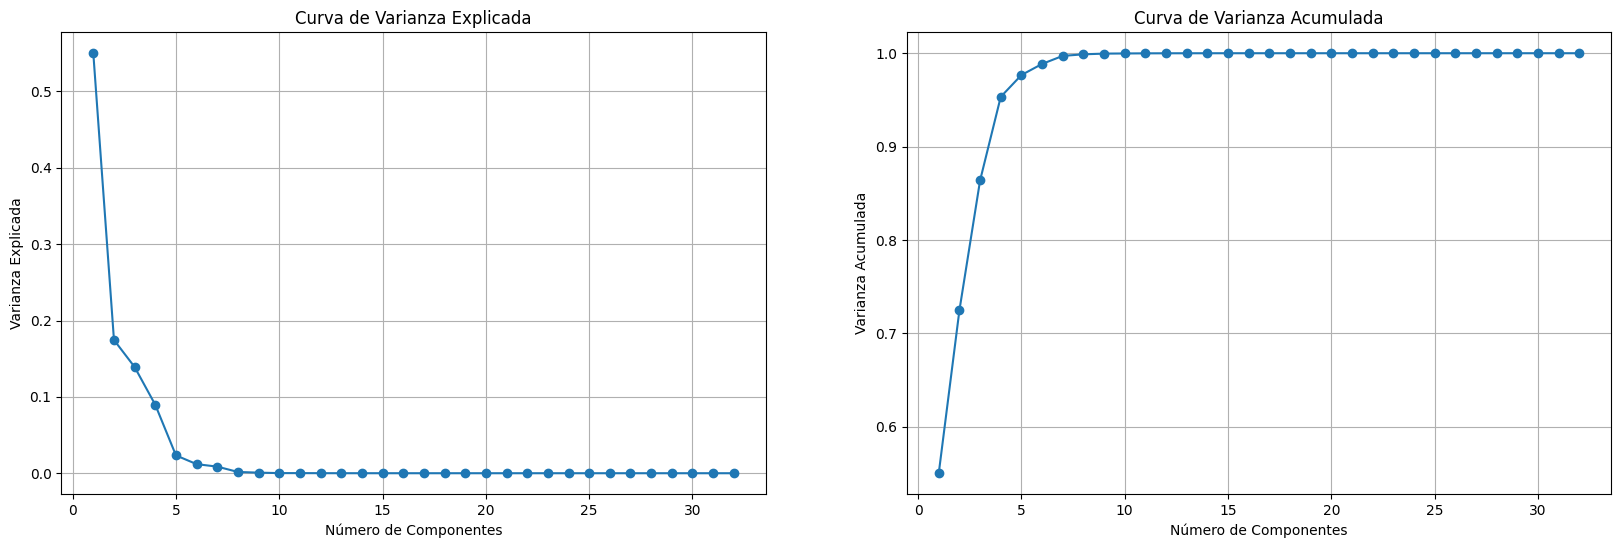

In [31]:
pca = PCA().fit(features_scaled)
fig,ax = plt.subplots(figsize=(20, 6),ncols=2, nrows=1)
ax[0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Número de Componentes')
ax[0].set_ylabel('Varianza Explicada')
ax[0].set_title('Curva de Varianza Explicada')
ax[0].grid(True)
ax[1].plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('Varianza Acumulada')
ax[1].set_title('Curva de Varianza Acumulada')
ax[1].grid(True)
plt.show()

In [32]:
n_components = pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].shape[0]
print(f'Número de componentes para explicar el 95% de la varianza: {n_components}')


Número de componentes para explicar el 95% de la varianza: 3


In [33]:
pca = PCA(n_components).fit(features_scaled)
X_grouped_pca = pca.transform(features_scaled)

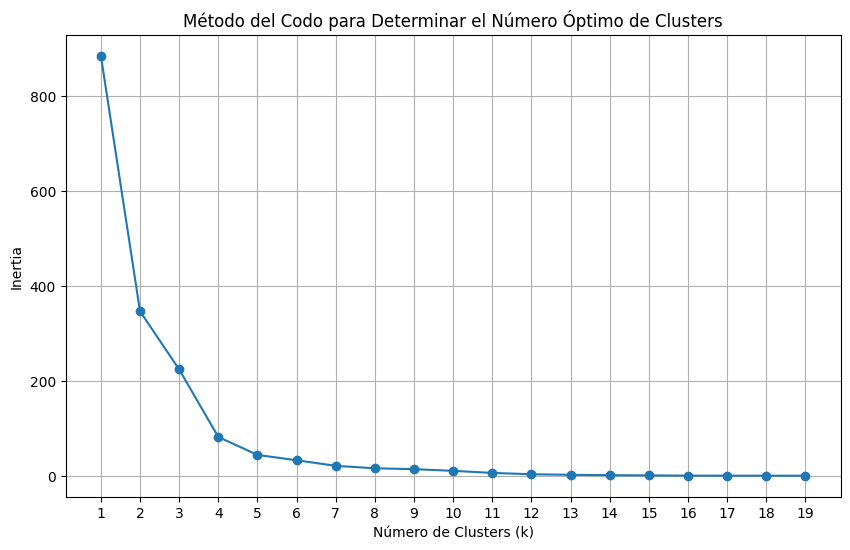

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 20)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_grouped_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [35]:
best_k = 3
print(f"El número óptimo de clusters según el método del codo es: {best_k}")

El número óptimo de clusters según el método del codo es: 3


In [36]:
features_scaled=pd.DataFrame(features_scaled,columns=features.columns)

In [37]:
features_scaled.set_index(features.index, inplace=True)

In [38]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_grouped_pca)
features_scaled['cluster'] = kmeans.labels_

In [39]:
features.loc[features_scaled['cluster']==1]

,mean_high,std_high,min_high,max_high,median_high,range_high,skewness_high,kurtosis_high,mean_low,std_low,...,skewness_close,kurtosis_close,mean_volume,std_volume,mean_marketCap,std_marketCap,daily_return_mean,daily_return_std,cumulative_return,volatility
symbol,,,,,,,,,,,,,,,,,,,,,
AAVE,161.814378,126.532646,2.843307e+01,666.864979,9.768556e+01,638.431909,1.356393,0.838624,146.966005,111.716574,...,1.312385,0.609331,2.482126e+08,2.857974e+08,2.055208e+09,1.487008e+09,0.002218,0.060693,0.692775,0.052736
ALGORAND,0.548392,0.520006,9.031098e-02,3.280179,3.139220e-01,3.189868,1.637705,2.112233,0.494505,0.455732,...,1.589066,1.806492,1.695150e+08,2.683449e+08,2.224236e+09,2.782648e+09,0.000277,0.061437,-0.948173,0.052685
ARWEAVE,18.235185,17.748374,5.432468e-01,90.940044,1.032052e+01,90.396797,1.420675,1.260659,16.190538,15.554814,...,1.407913,1.187903,3.627738e+07,5.230431e+07,6.867867e+08,7.086674e+08,0.005711,0.078331,63.237787,0.067264
BEAM,0.027434,0.002848,2.259617e-02,0.036106,2.739218e-02,0.013510,0.522729,0.249499,0.025112,0.002362,...,0.101827,-0.583076,2.726080e+07,2.835873e+07,1.323895e+09,1.431073e+08,-0.001983,0.053163,-0.178282,0.051239
BITGET,0.375218,0.320654,6.124466e-02,1.484946,2.063653e-01,1.423701,1.446782,1.515871,0.358896,0.304889,...,1.427532,1.441109,1.387411e+07,1.662877e+07,4.242824e+08,5.076126e+08,0.003271,0.036228,14.614879,0.029149
BITTENSOR,240.463945,218.909496,1.263059e-01,767.679680,8.900580e+01,767.553374,0.802111,-0.738479,215.352777,196.510205,...,0.796048,-0.752248,1.508846e+07,3.123059e+07,1.212193e+09,1.511145e+09,1.500171,32.239567,2805.315258,0.631638
BNB,184.890976,194.159060,1.012110e-01,720.672601,3.956654e+01,720.571390,0.721295,-0.645159,174.563692,183.013165,...,0.715568,-0.653336,9.222808e+08,1.310702e+09,2.835309e+10,3.006245e+10,0.005369,0.064550,5847.633474,0.046086
BONK,0.000009,0.000012,1.550170e-07,0.000047,9.110732e-07,0.000047,1.199404,0.157983,0.000007,0.000010,...,1.162294,-0.004598,1.281310e+08,2.466019e+08,4.918292e+08,7.066000e+08,0.018924,0.162033,193.483861,0.093729
CELESTIA,12.772593,4.537133,2.387579e+00,20.911431,1.258610e+01,18.523852,-0.339860,-0.520661,11.558204,4.281786,...,-0.298027,-0.524668,2.181233e+08,1.569332e+08,2.021524e+09,7.280428e+08,0.008576,0.075622,2.763485,0.065980


/tmp/ipykernel_57862/3604801925.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_grouped_pca_[ix, 0], X_grouped_pca_[ix, 1], label=f'Cluster {cluster}', cmap='viridis')


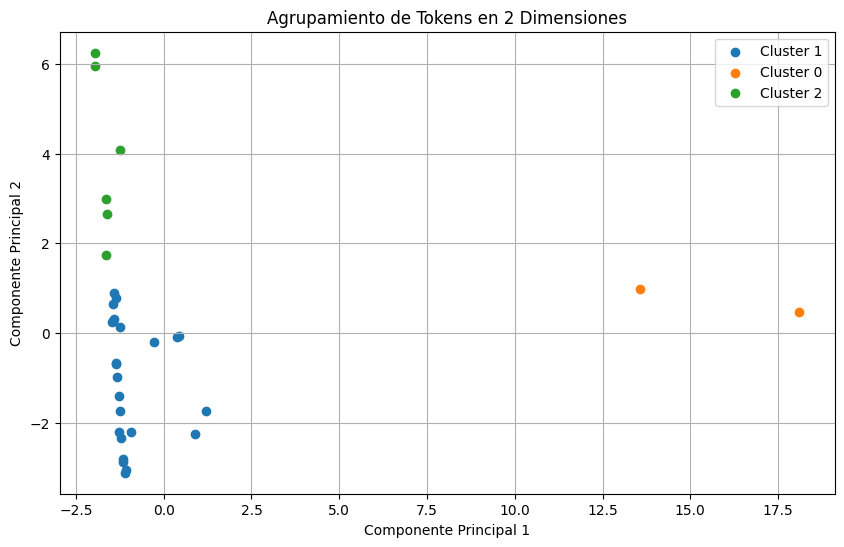

In [40]:
pca_ = PCA(n_components=2).fit(features_scaled.drop(columns='cluster'))
X_grouped_pca_ = pca_.transform(features_scaled.drop(columns='cluster'))

plt.figure(figsize=(10, 6))

clusters_unique = features_scaled['cluster'].unique()

for cluster in clusters_unique:
    ix = features_scaled['cluster'] == cluster
    plt.scatter(X_grouped_pca_[ix, 0], X_grouped_pca_[ix, 1], label=f'Cluster {cluster}', cmap='viridis')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamiento de Tokens en 2 Dimensiones')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
features_scaled.groupby('cluster').size()

cluster
0     2
1    24
2     6
dtype: int64

In [42]:
for cluster_id, group in features_scaled.groupby('cluster'):
    print(f'Cluster {cluster_id}')
    print(group.index.tolist())

Cluster 0
['ETHERIUM', 'MAKER']
Cluster 1
['AAVE', 'ALGORAND', 'ARWEAVE', 'BEAM', 'BITGET', 'BITTENSOR', 'BNB', 'BONK', 'CELESTIA', 'CORE', 'DOGWITFHAT', 'FLOW', 'INJECTIVO', 'JUPITER', 'MONERO', 'OKB', 'ONDO', 'OPTIMISM', 'PYTH NETWORK', 'SEI', 'SOLANA', 'STACKS', 'SUI', 'THOR']
Cluster 2
['FANTOM', 'FETCH_AI', 'FLOKI', 'GALA', 'THETA', 'XRP']


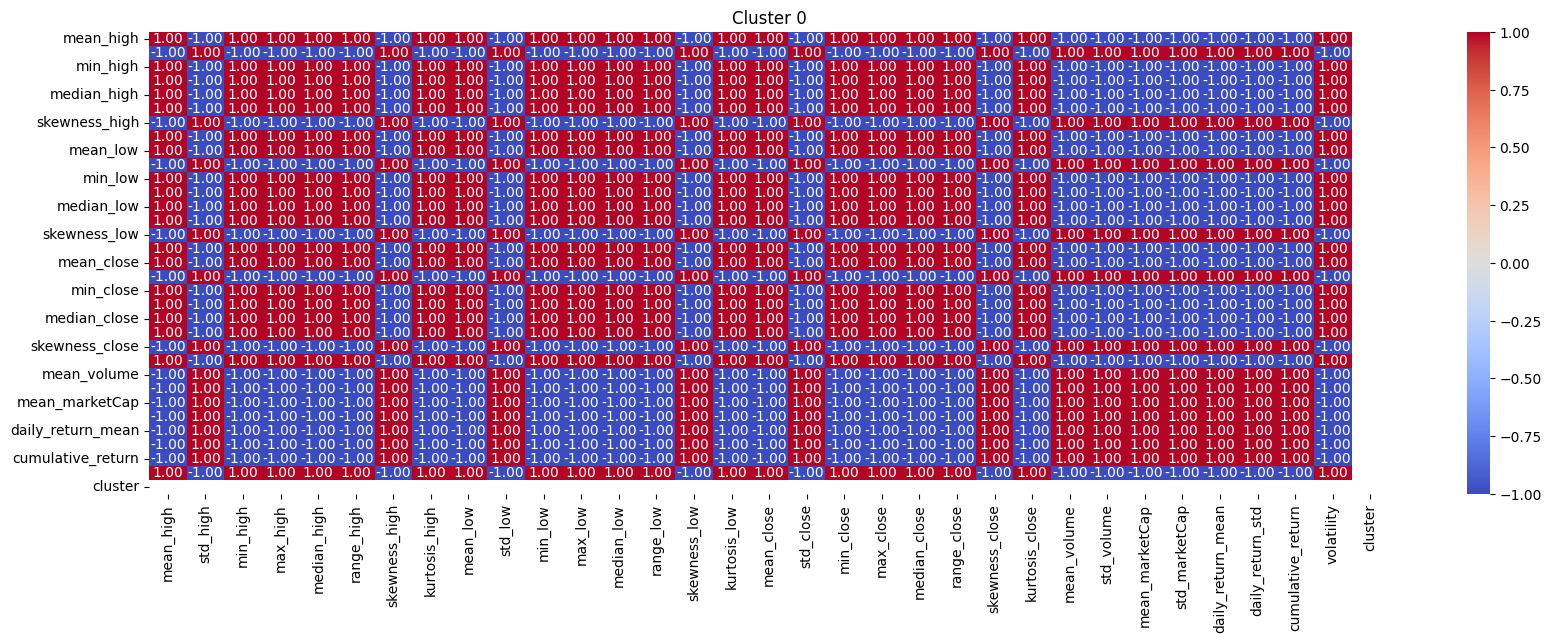

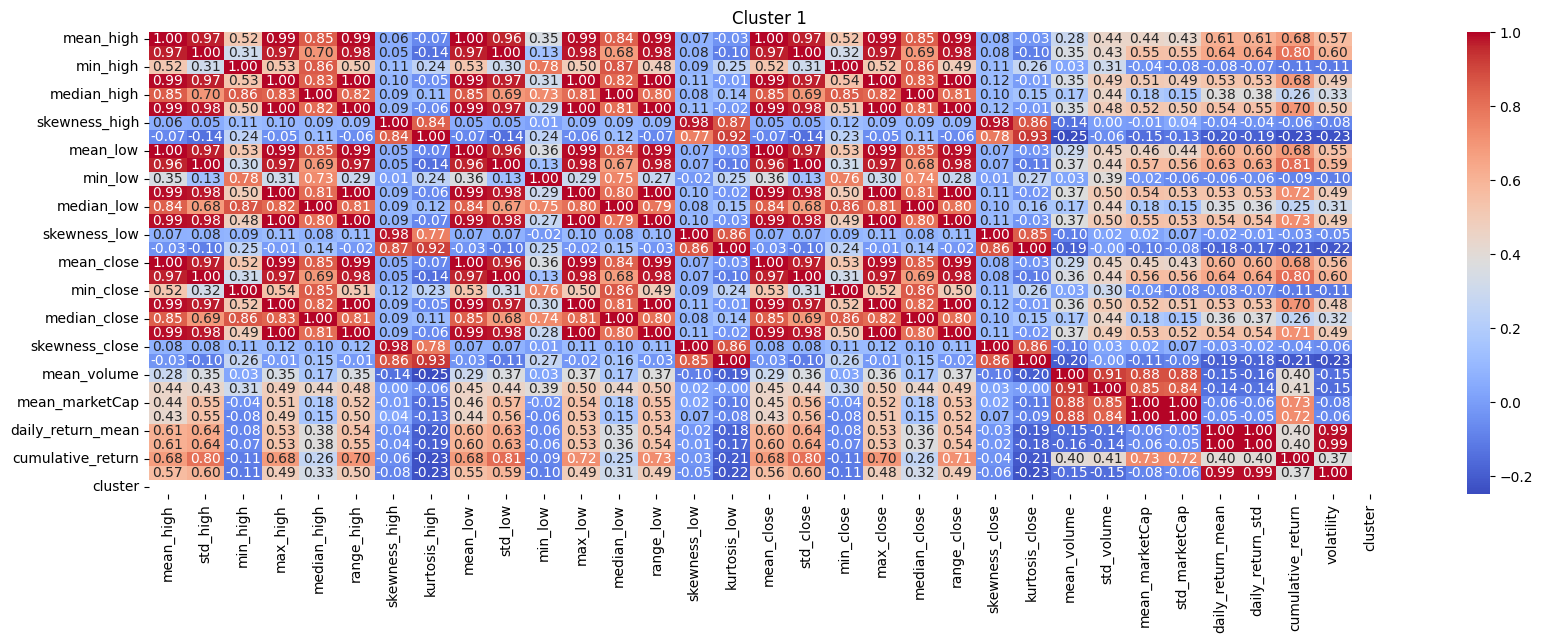

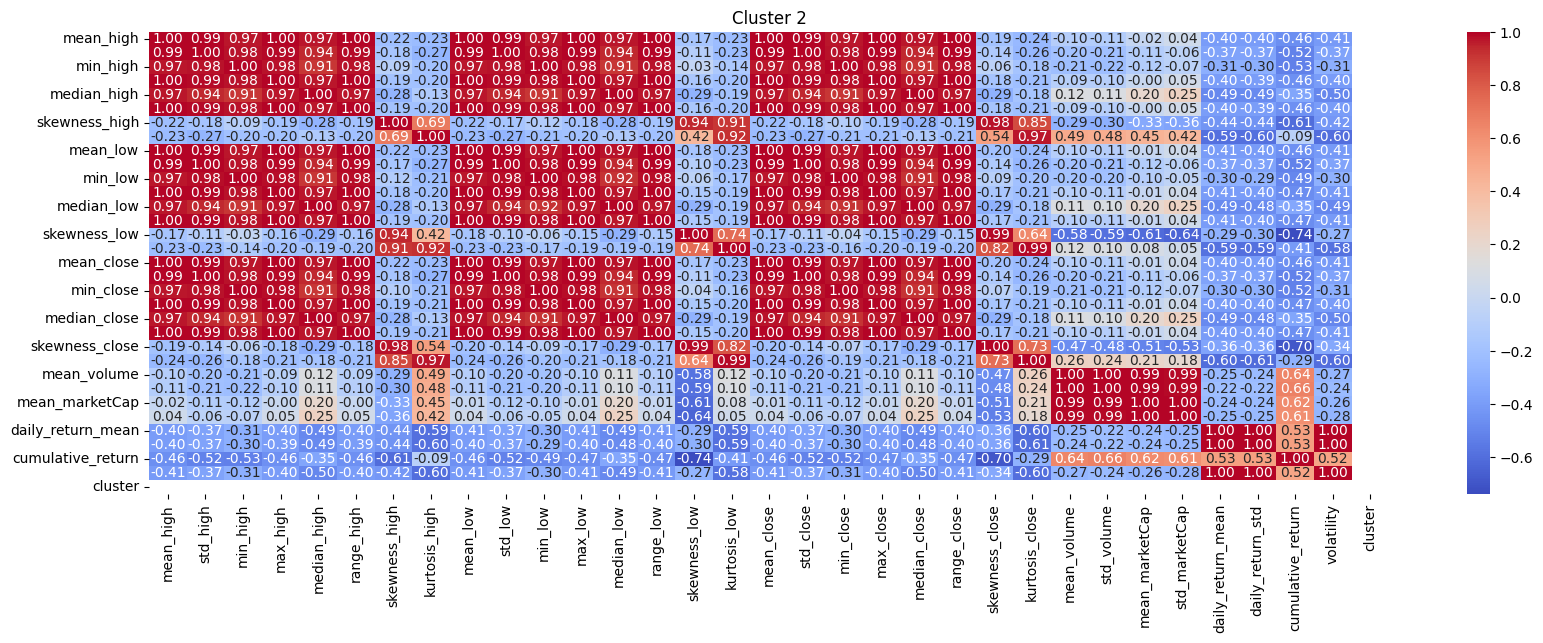

In [43]:
for cluster_id, group in features_scaled.groupby('cluster'):
    plt.figure(figsize=(20, 6))
    plt.title(f'Cluster {cluster_id}')
    sns.heatmap(group.corr(), annot=True, cmap='coolwarm', fmt='.2f')

vemos la correlacion de cada cluster y vemos que el cluster 1 es descartable por que tienen un correlacion total o nada, el cluster 1 y 2 son de interes debido que en ambos hay una correalacion notable entre algunos datos pero el cluster de mayor interes el cluster 2. debido a su similar comportamiento vamos a realizar un modelo de LSTM  para predecir su precio close con estos datos de este grupo de tokens

note! guardamos la funcion de caracteristcas, el scaler y el kmeans

In [44]:
import pickle

In [49]:
pickle.dump(scaler_pca, open('./tools/scaler_features.pkl', 'wb'))
pickle.dump(kmeans, open('./tools/kmeans_model.pkl', 'wb'))
pickle.dump(pca, open('./tools/pca_features.pkl', 'wb'))
